In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [32]:
data = pd.read_csv('preprocessed_data.csv')

X = data.drop('label', axis=1) #features
y = data['label'].str.replace(r'\s+', '', regex=True) #labels
len(X)

2622

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],  # Testing different values for n_estimators
    'max_depth': [None,5, 10, 15, 20, 25, 30, 35, 40, 45, 50],       # Testing different values for max_depth
}

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model and best parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': None, 'n_estimators': 150}


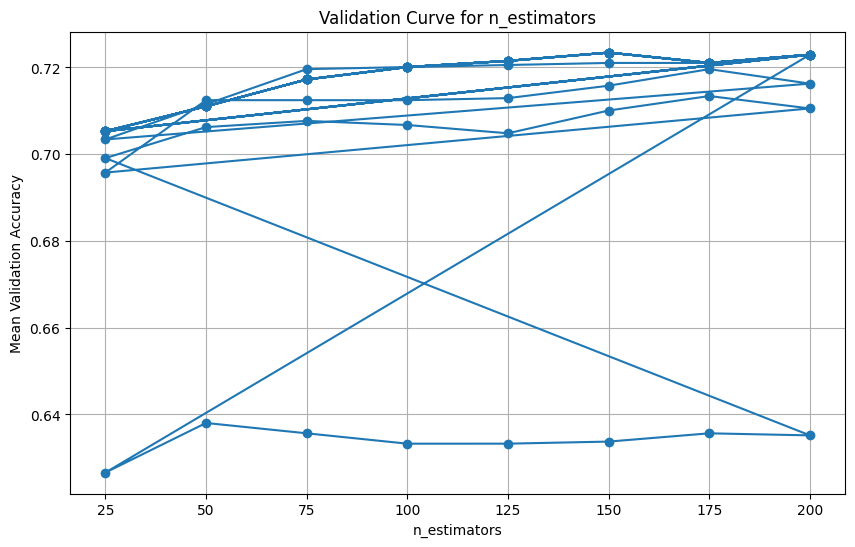

In [35]:
import matplotlib.pyplot as plt

# Extract and plot mean validation scores
mean_scores = grid_search.cv_results_['mean_test_score']
params_n_estimators = [param['n_estimators'] for param in grid_search.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(params_n_estimators, mean_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Curve for n_estimators')
plt.grid(True)
plt.show()


In [36]:
# Training the model using the best parameters
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [38]:
y_pred = final_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6952380952380952
